In [174]:
import cv2
import subprocess
from glob import glob
import IPython.display as ipd
from tqdm import tqdm
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
import numpy as np
from PIL import Image
import datetime
import time



plt.style.use('ggplot')

In [2]:
input_file = '../data/demo_labeling.MP4'
subprocess.run(['ffmpeg',
                '-i',
                input_file,
                '-qscale',
                '0',
                '../data/demo_labeling_01.mp4',
                '-loglevel',
                'quiet']
              )

File '../data/demo_labeling_01.mp4' already exists. Overwrite? [y/N] 

CompletedProcess(args=['ffmpeg', '-i', '../data/demo_labeling.MP4', '-qscale', '0', '../data/demo_labeling_01.mp4', '-loglevel', 'quiet'], returncode=1)

In [3]:
!ls -GFlash --color

total 8.6M
4.0K drwxrwxr-x 3 vimukthi 4.0K May 21 21:36 ./
4.0K drwxrwxr-x 7 vimukthi 4.0K May 20 12:17 ../
4.0K -rw-rw-r-- 1 vimukthi 1.7K May 17 10:23 augment_labels.py
4.0K drwxrwxr-x 2 vimukthi 4.0K May 18 20:05 .ipynb_checkpoints/
4.0K -rw-rw-r-- 1 vimukthi  257 May 17 23:25 show_imgs.py
1.2M -rw-rw-r-- 1 vimukthi 1.2M May 18 08:27 Text_Recognition_PaddleOCR.ipynb
7.4M -rw-rw-r-- 1 vimukthi 7.4M May 21 21:35 Video_capturing.ipynb


# Displaying the Video

In [4]:
ipd.Video('../data/demo_labeling_01.mp4', width=700)

In [5]:
# Load the Video capture
cap = cv2.VideoCapture('../data/demo_labeling_01.mp4')

# Total number of frames in Video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

393.0

In [6]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 720.0, Width 1280.0


In [7]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS: {fps:0.2f}')

cap.release()

FPS: 5.00


# Pulling in Images from Video

In [83]:
cap = cv2.VideoCapture('../data/demo_labeling_01.mp4')
ret, img = cap.read()
print(f'Returned: {ret} and img of shape {img.shape}')

Returned: True and img of shape (720, 1280, 3)


In [105]:
### --- Helper function for plotting opencv images in notebook --- ###
def display_cv2_img(img, figsize=(15, 10), title=None):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    if title:
        ax.set_title(f'{title}', color='r', fontweight='bold')
    ax.imshow(img_)
    ax.axis('off')
    plt.show()
    
def display_img(img, figsize=(15, 10), title=None):
    fig, ax = plt.subplots(figsize=figsize)
    if title:
        ax.set_title(f'{title}', color='r', fontweight='bold')
    ax.imshow(img, cmap='Greys')
    ax.axis('off')
    plt.show()

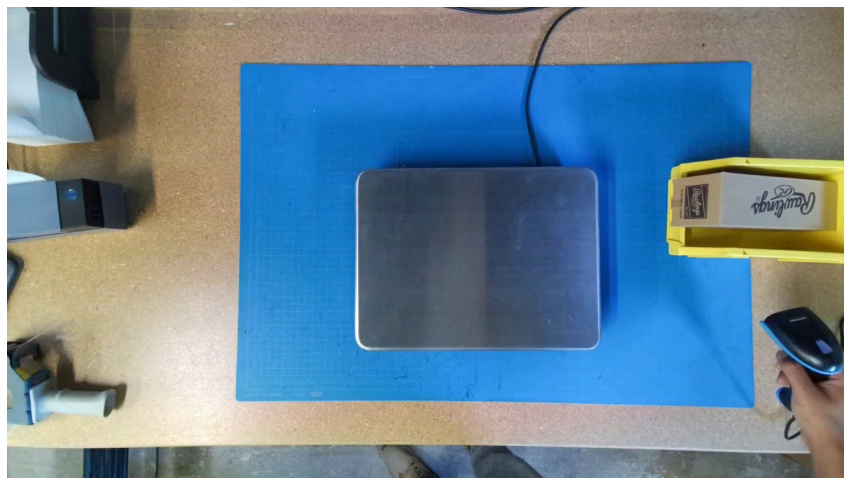

In [85]:
display_cv2_img(img)

# Display multiple frames from the video

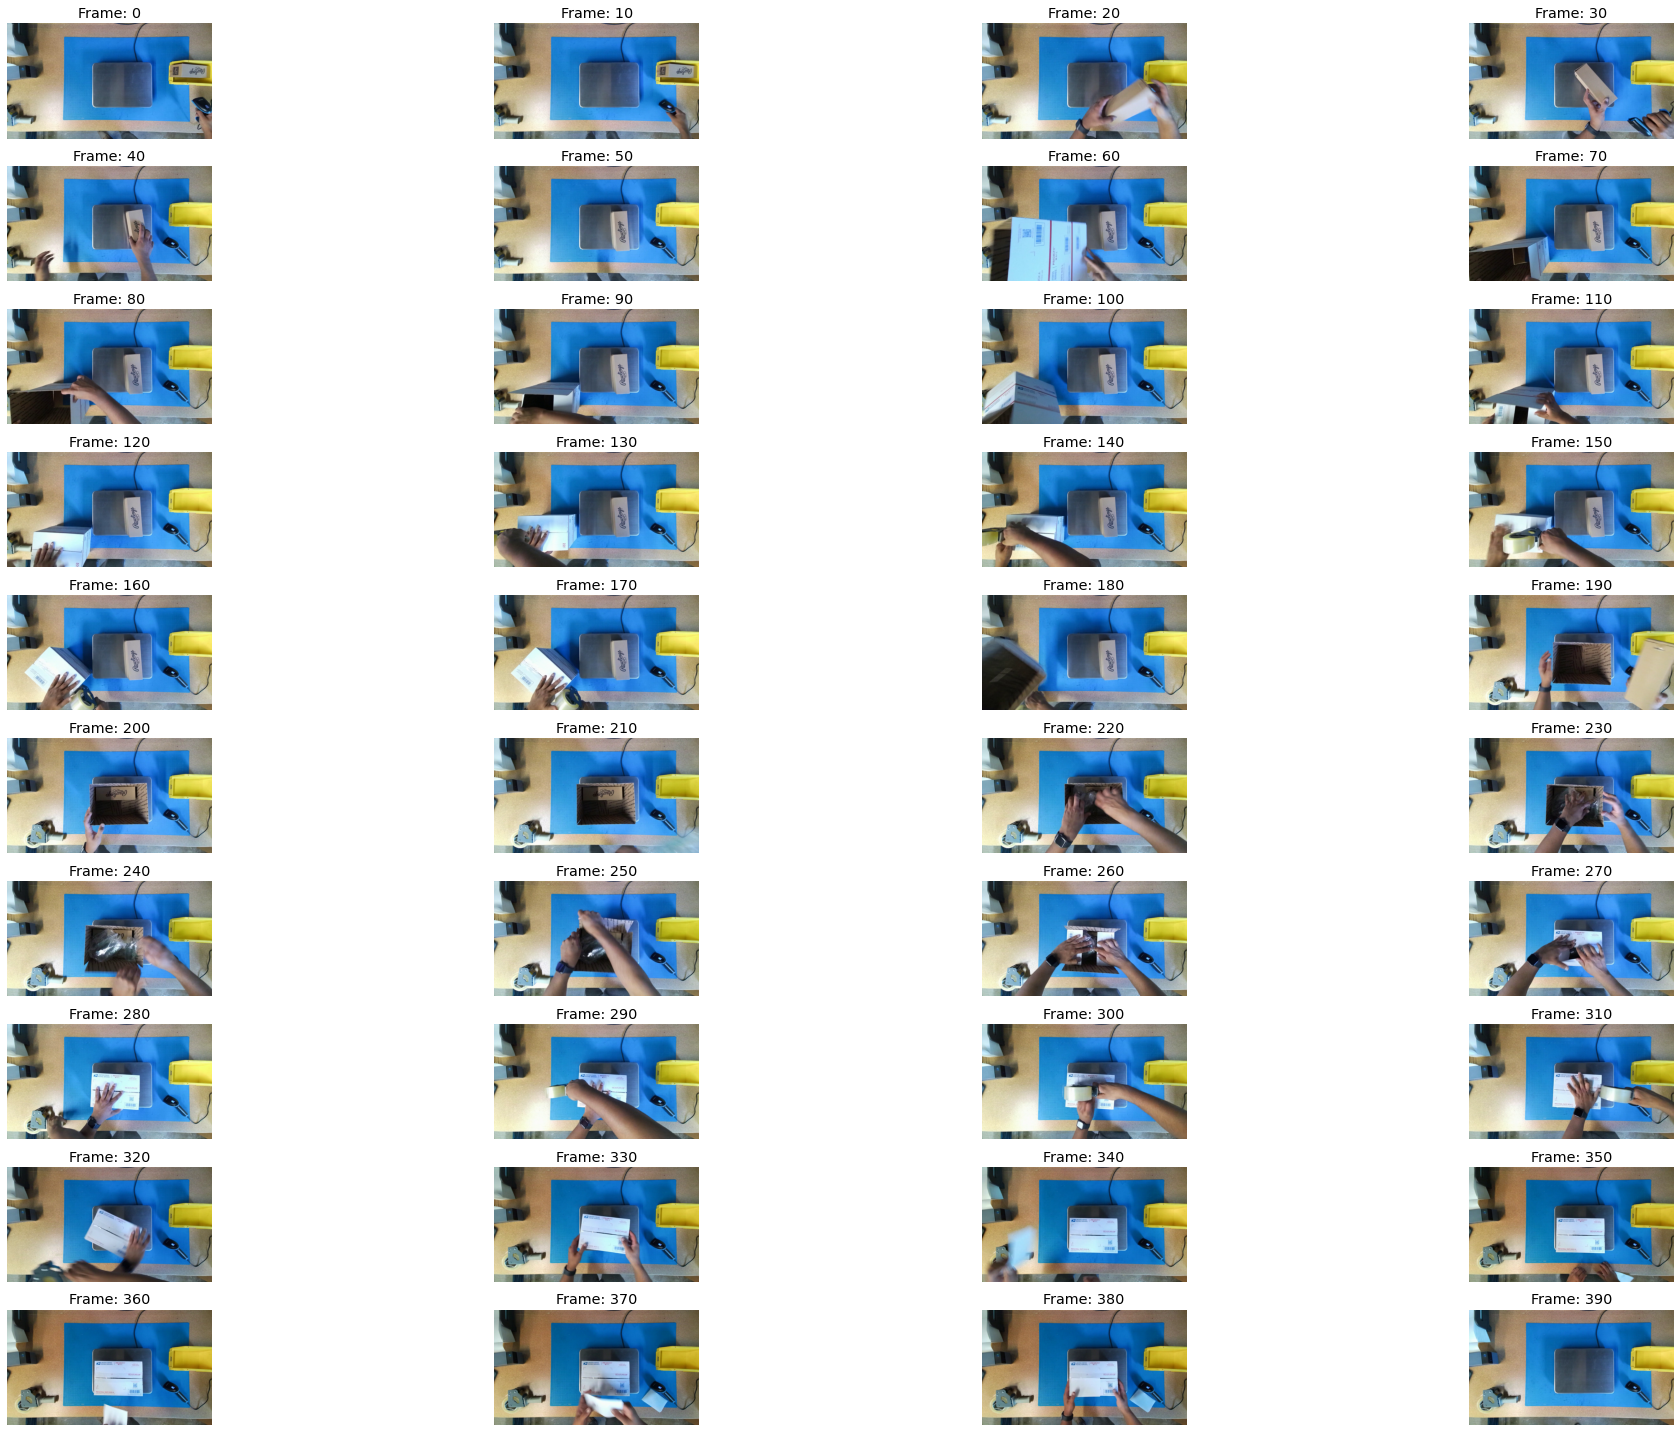

In [11]:
fig, axs = plt.subplots(10, 4, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture('../data/demo_labeling_01.mp4')
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 10 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1
        
plt.tight_layout()
plt.show()
cap.release()

# Getting an Individual Frame

In [12]:
def extract_img(frame_no):
    cap = cv2.VideoCapture('../data/demo_labeling_01.mp4')
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    img_idx = 0
    for frame in range(n_frames):
        ret, img = cap.read()
        if ret == False:
            break
        if frame == frame_no:
            break
    cap.release()
    return img

# Frame 380 

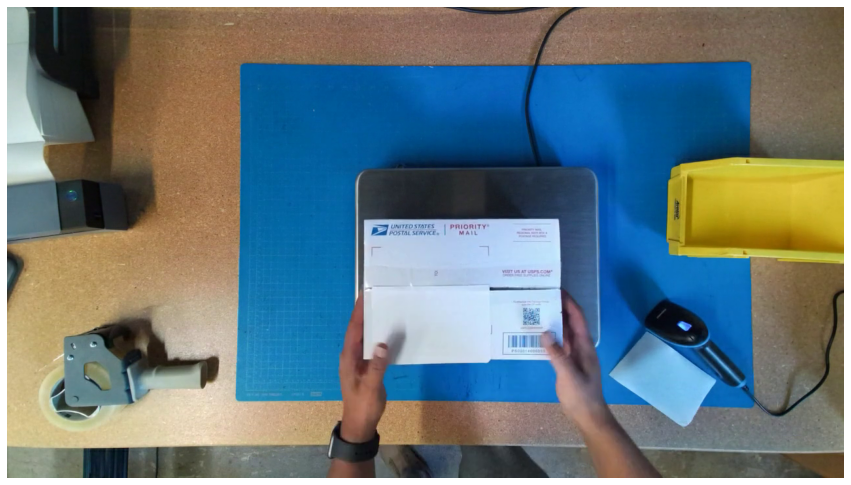

In [13]:
img = extract_img(380)
display_cv2_img(img)

In [14]:
def save_img(path, save_as, img):
    cv2.imwrite(f'{path}/{save_as}.jpg', img)
    print(f'Image is saved at {path}')

In [15]:
save_img('../data/processed', 'frame_380', img)

Image is saved at ../data/processed


In [16]:
# Blending two images: frame image from video + label

def load_imgs(path_1, path_2):
    img1 = cv2.imread(path_1)
    img2 = cv2.imread(path_2)
    return img1, img2

def blend_imgs(img1, img2):
    imgs = []
    imgs.append(img1)
    imgs.append(img2)
    seq = iaa.Sequential([
        iaa.BlendAlpha(0.5,
                      foreground=iaa.Rotate(90))
    ])
    return seq(images=imgs)

def save_imgs(imgs):
    # get the current date and time
    now = datetime.datetime.now()
    i = 1
    for img in imgs:
        cv2.imwrite(f'../data/processed/blended{i}_{now}.jpg', img)
        i += 1
    print('All images are saved! at ../data/processed/')



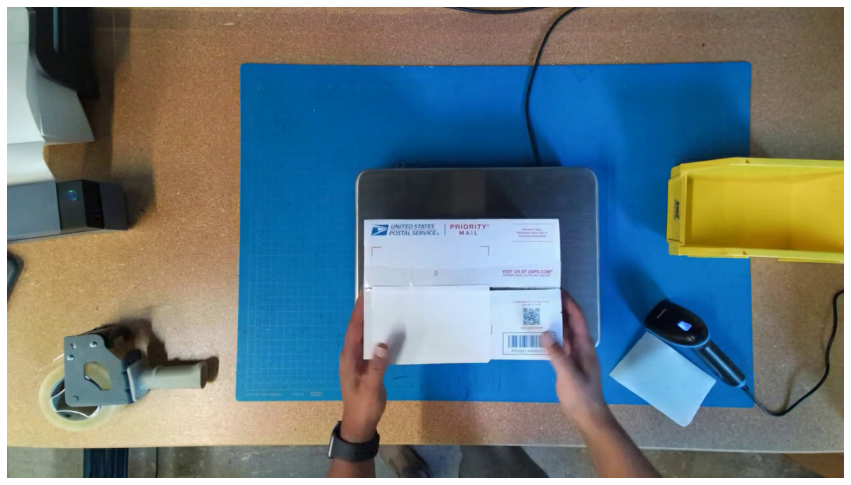

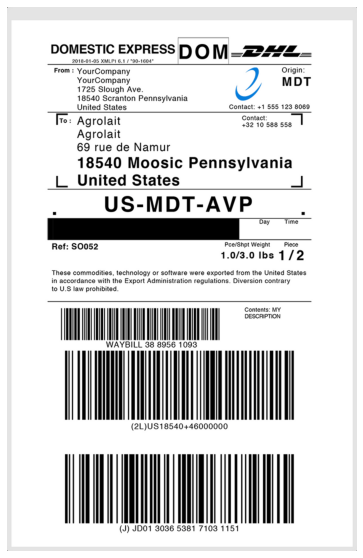

In [17]:
img1, img2 = load_imgs('../data/processed/frame_380.jpg', 
                      '../data/label1.png')

display_cv2_img(img1)
display_cv2_img(img2)

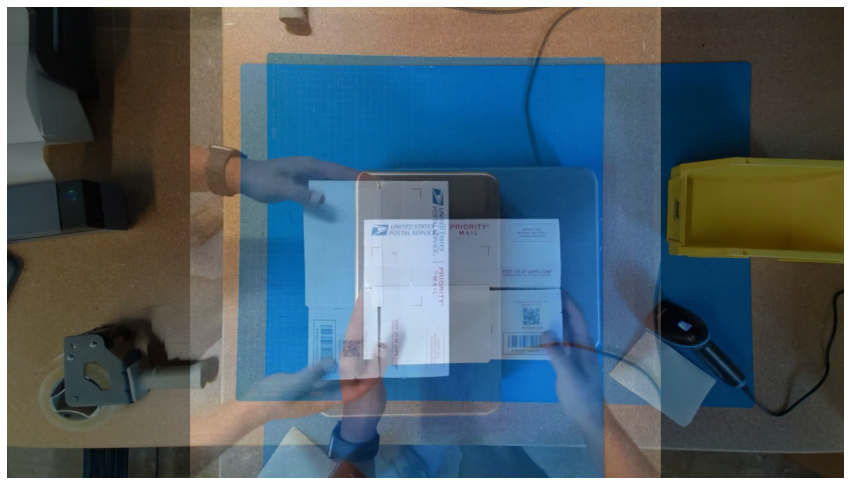

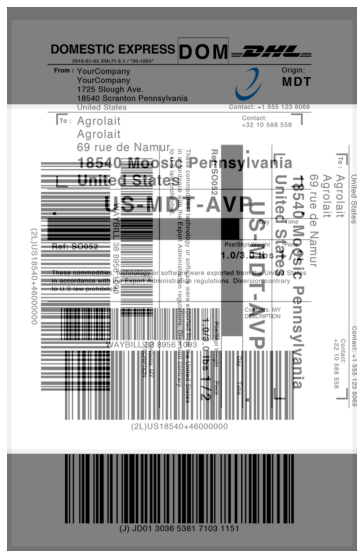

In [18]:
imgs = blend_imgs(img1, img2) # Just blending images using imgaug: alpha bending...
display_cv2_img(imgs[0])
display_cv2_img(imgs[1])

In [19]:
# import json

# f = open('../data/processed/frame_380.json')
# data = json.load(f)
# f.close()

# data = data[0]
# data['label']

In [20]:
# labels = data['label'][0]

# x = labels['x']
# y = labels['y']
# w = labels['width']
# h = labels['height']

# mask = np.zeros(b)


# Positioning Label1 on the Frame_380

In [53]:

now = datetime.datetime.now()

img1 = Image.open(r'../data/processed/frame_380.jpg')
img2 = Image.open(r'../data/label1.png')
print(img2.size)
print(img1.size)
# new_img = img2.resize((150, 250))
# new_img = img2.resize((100, 200)) # label_size according to the video: refer frame no. 380
# new_img = img2.resize((300, 600)) # minimum resolution required for detection of the text
new_img = img2.resize((400, 800))
# new_img.show()

img1.paste(new_img, (553, 433),)
img1.save(f'../data/processed/frame_300_{now}.jpg')
img1.show()

(2000, 3114)
(1280, 720)


# Making Rotated Images

In [22]:
### --- Custom Rotations --- ###
canvas = 255 * np.ones((720, 1280, 3), np.uint8) # h, w
canvas = Image.fromarray(canvas) # converting PIL image type
# canvas.show()

bg_img = Image.open(r'../data/processed/frame_380.jpg')
lbl_img = Image.open(r'../data/label1.png')

lbl_img = lbl_img.resize((400, 800))
# lbl_img.show()

lbl_w, lbl_h = lbl_img.size
canvas_w, canvas_h = canvas.size
offset = ((canvas_w - lbl_w) // 2, (canvas_h - lbl_h) // 2) # for centering both images
canvas.paste(lbl_img, offset)
# canvas.show()

## Rotated images...
rotated_70 = canvas.rotate(70)
rotated_70.show()
rotated_70.save('../data/processed/rotated_70.jpg')
# print(rotated_180.size)

rotated_90 = canvas.rotate(90)
rotated_90.show()
rotated_90.save('../data/processed/rotated_90.jpg')
# print(rotated_180.size)

rotated_130 = canvas.rotate(130)
rotated_130.show()
rotated_130.save('../data/processed/rotated_130.jpg')

rotated_minus_70 = canvas.rotate(-70)
rotated_minus_70.show()
rotated_minus_70.save('../data/processed/rotated_minus_70.jpg')

rotated_minus_90 = canvas.rotate(-90)
rotated_minus_90.show()
rotated_minus_90.save('../data/processed/rotated_minus_90.jpg')

rotated_minus_130 = canvas.rotate(-130)
rotated_minus_130.show()
rotated_minus_130.save('../data/processed/rotated_minus_130.jpg')

# bg_img.paste(lbl_img, (553, 433))
# bg_img.show()



(eog:3523536): EOG-CRITICAL **: 21:36:37.691: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:3523536): GLib-GIO-CRITICAL **: 21:36:37.691: g_file_equal: assertion 'G_IS_FILE (file1)' failed

(eog:3523536): EOG-CRITICAL **: 21:36:37.691: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:3523536): GLib-GIO-CRITICAL **: 21:36:37.691: g_file_equal: assertion 'G_IS_FILE (file1)' failed

(eog:3523536): EOG-CRITICAL **: 21:36:37.866: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:3523536): GLib-GIO-CRITICAL **: 21:36:37.867: g_file_equal: assertion 'G_IS_FILE (file1)' failed

(eog:3523536): EOG-CRITICAL **: 21:36:38.061: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:3523536): GLib-GIO-CRITICAL **: 21:36:38.061: g_file_equal: assertion 'G_IS_FILE (file1)' failed


# Detecting and Aligning Text Line

- Final output should be each text line is aligned perfectly to the horizontal axis...

## Method 1: Text Angle Detection 90, 180, 270

Steps are like this,
- Load the image, convert to grayscale, and Gaussian blur
- Adaptive threshold to get a binary image
- Find contours and filter using contour area
- Draw filtered contours onto mask
- Split image horizontally or vertically based on orientation
- Count number of pixels in each half

Works only if the text is skewed on one side of the image...

In [23]:
# %%html
# <iframe src="https://stackoverflow.com/questions/58010660/detect-image-orientation-angle-based-on-text-direction" width="1200" height="1000"></iframe>
# from IPython.display import IFrame
# IFrame("https://stackoverflow.com/questions/58010660/detect-image-orientation-angle-based-on-text-direction", 900,500)

In [24]:
# Source: https://stackoverflow.com/questions/58010660/detect-image-orientation-angle-based-on-text-direction
def detect_angle(image):
    mask = np.zeros(image.shape, dtype=np.uint8)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    adaptive = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,4)

    cnts = cv2.findContours(adaptive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    for c in cnts:
        area = cv2.contourArea(c)
        if area < 45000 and area > 20:
            cv2.drawContours(mask, [c], -1, (255,255,255), -1)

    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    display_cv2_img(mask)
    h, w = mask.shape
    
    # Horizontal
    if w > h:
        left = mask[0:h, 0:0+w//2]
        right = mask[0:h, w//2:]
        left_pixels = cv2.countNonZero(left)
        right_pixels = cv2.countNonZero(right)
        return 0 if left_pixels >= right_pixels else 180
    # Vertical
    else:
        top = mask[0:h//2, 0:w]
        bottom = mask[h//2:, 0:w]
        top_pixels = cv2.countNonZero(top)
        bottom_pixels = cv2.countNonZero(bottom)
        return 90 if bottom_pixels >= top_pixels else 270




(eog:3523536): EOG-CRITICAL **: 21:36:38.218: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:3523536): GLib-GIO-CRITICAL **: 21:36:38.220: g_file_equal: assertion 'G_IS_FILE (file1)' failed



(eog:3523536): EOG-CRITICAL **: 21:36:38.297: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:3523536): GLib-GIO-CRITICAL **: 21:36:38.297: g_file_equal: assertion 'G_IS_FILE (file1)' failed


Angle of the image: 180


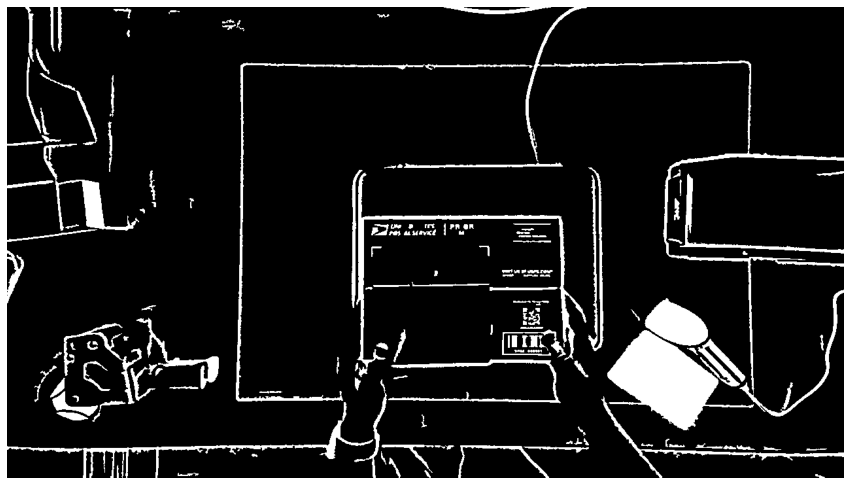

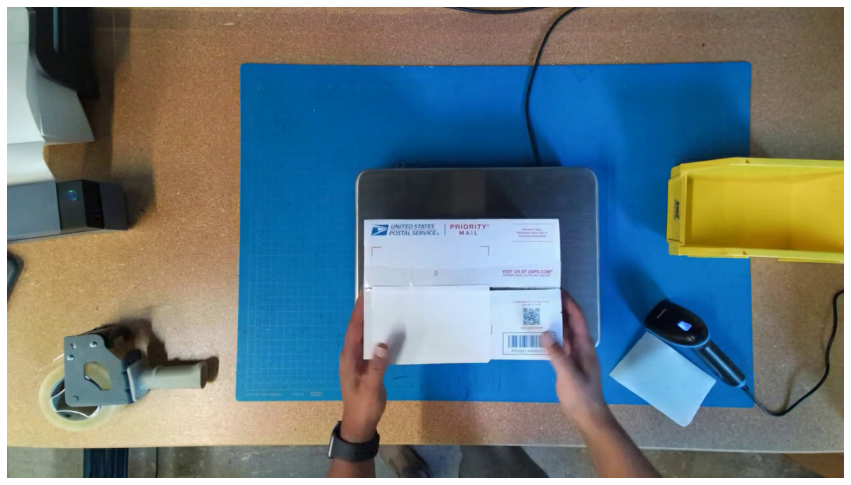

In [25]:
img = cv2.imread('../data/processed/frame_380.jpg')
angle = detect_angle(img)
print(f'Angle of the image: {angle}')
display_cv2_img(img)

Angle of the image(70): 180
Angle of the image(0): 90
Angle of the image(90): 180


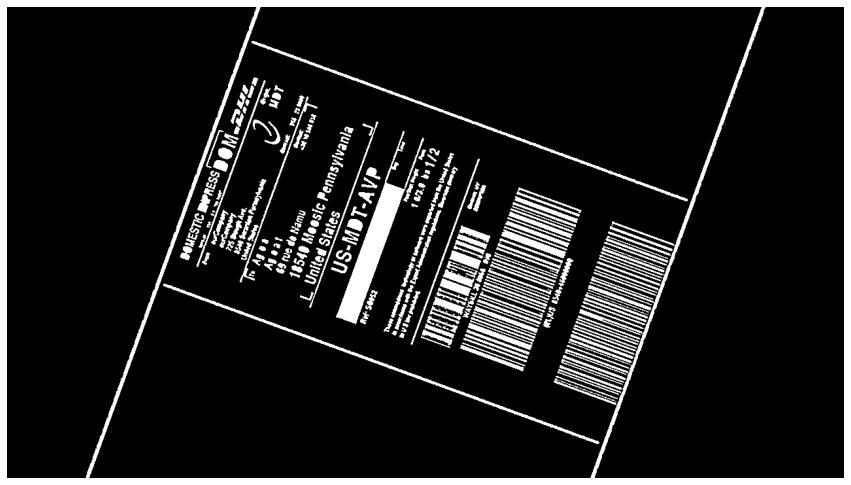

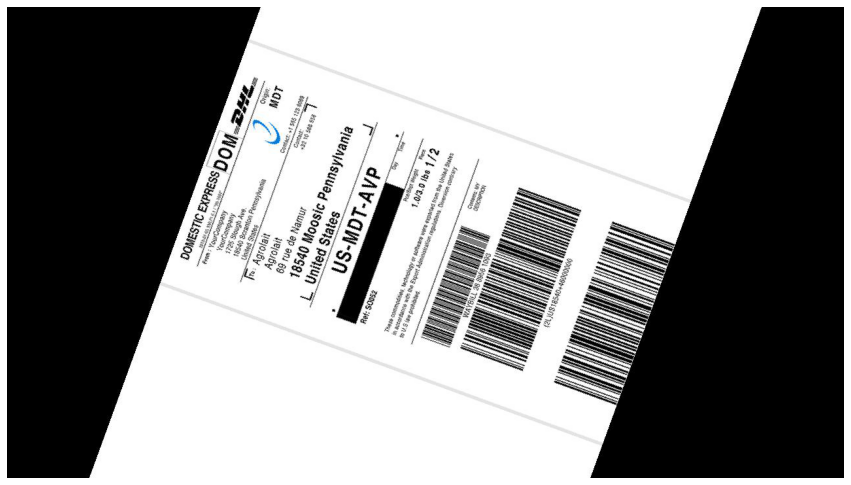

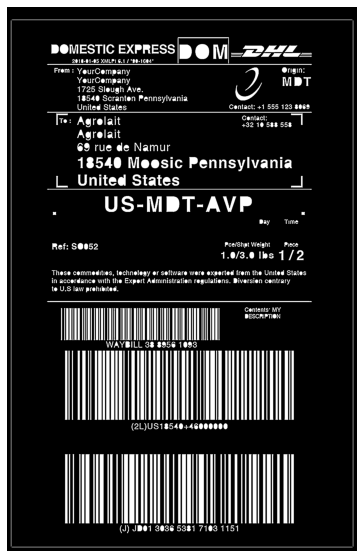

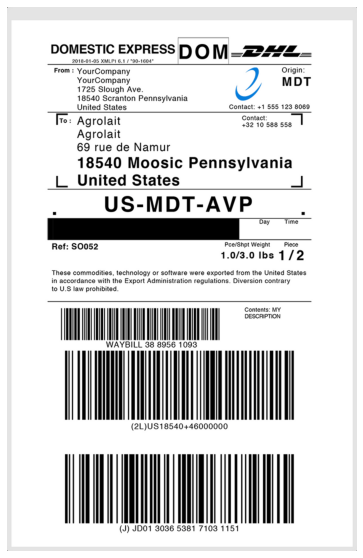

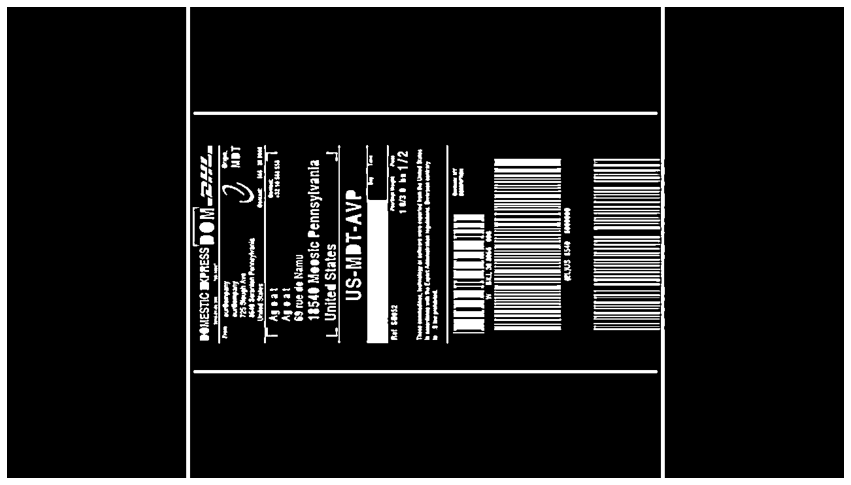

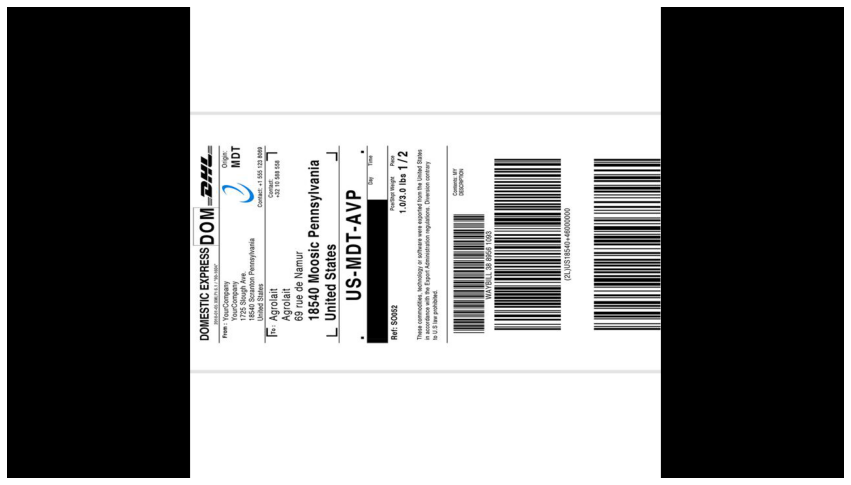

In [26]:
img = cv2.imread('../data/processed/rotated_70.jpg')
angle = detect_angle(img)
print(f'Angle of the image(70): {angle}')
display_cv2_img(img)

img = cv2.imread('../data/label1.png')
angle = detect_angle(img)
print(f'Angle of the image(0): {angle}')
display_cv2_img(img)

img = cv2.imread('../data/processed/rotated_90.jpg')
angle = detect_angle(img)
print(f'Angle of the image(90): {angle}')
display_cv2_img(img)

This is an amature approach for these types of labels as barcodes have most of pixels within the mask, hence it will determine the angle of the image. Aslo there is no preprocessing step isn't applied like the example images.

![Exmple Images from the source](https://i.stack.imgur.com/ceaqa.png)
![Exmple Images from the source](https://i.stack.imgur.com/GC676.png)
![Exmple Images from the source](https://i.stack.imgur.com/MlNBz.png)


## Method 2: Hough Transform

https://stackoverflow.com/questions/23783061/detect-text-orientation

In [229]:
from skimage.color import rgb2gray
from skimage.transform import rotate
from skimage.transform import (hough_line, hough_line_peaks)
from scipy.stats import mode
from skimage import io
from skimage.filters import threshold_otsu, sobel
from matplotlib import cm
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat, skeletonize)
from skimage.morphology import disk, rectangle  # noqa
from skimage.filters import gaussian, laplace
from skimage.segmentation import flood, flood_fill

def binarizeImage(RGB_image):
    image = rgb2gray(RGB_image)
    threshold = threshold_otsu(image)
    bina_image = image < threshold
    
    # Image.fromarray(bina_image).show()
    # plt.show()
    
    return bina_image


def findEdges(bina_image):
    ## 1st edge detection
    image_edges = gaussian(bina_image, sigma=0.5)
    image_edges = laplace(bina_image, ksize=3)
    image_edges = sobel(bina_image)
    # Image.fromarray(image_edges * 255).show()
    # plt.show()
    
    ## morphological operations
    # footprint = disk(15)
    footprint = rectangle(5, 5) # structural element
    # dilated = closing(image_edges, footprint)
    dilated = dilation(image_edges, footprint)
    # Image.fromarray(dilated * 255).show()
    # plt.show()
    
    ## 2nd edge detection
    dilated_sb = sobel(dilated)
    # dilated_sb = sobel(dilated_sb)
    Image.fromarray(dilated_sb * 255).show()
    plt.show()
    
    # dilated_sb = flood_fill(dilated_sb, (0, 0), 1)
    
    # return image_edges
    return dilated_sb

def findTiltAngle(image_edges): # Hough Transform
    h, theta, d = hough_line(image_edges)
    accum, angles, dists = hough_line_peaks(h, theta, d)
    angle = np.rad2deg(mode(angles, keepdims=True)[0][0])
  
    # if (angle < 0):
    #     angle = angle + 90
    # else:
    #     angle = angle - 90
    
    # Plot Image and Lines    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(image_edges, cmap='gray')

    origin = np.array((0, image_edges.shape[1]))

    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):

        y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
        ax.plot(origin, (y0, y1), '-r')

    ax.set_xlim(origin)
    ax.set_ylim((image_edges.shape[0], 0))
    ax.set_axis_off()
    ax.set_title('Detected lines')
    plt.show()
    
    print('Angle detected:', angle)
    return angle
        
# result = findTiltAngle(findEdges(bina_image))
# print(result)

def rotateImage(RGB_image, angle):
    return rotate(RGB_image, angle)

def pipeline(img_path):
    img = io.imread(img_path)
    bina_image = binarizeImage(img)
    image_edges = findEdges(bina_image)
    angle = findTiltAngle(image_edges)
    result =rotateImage(io.imread(img_path), angle)
    return result

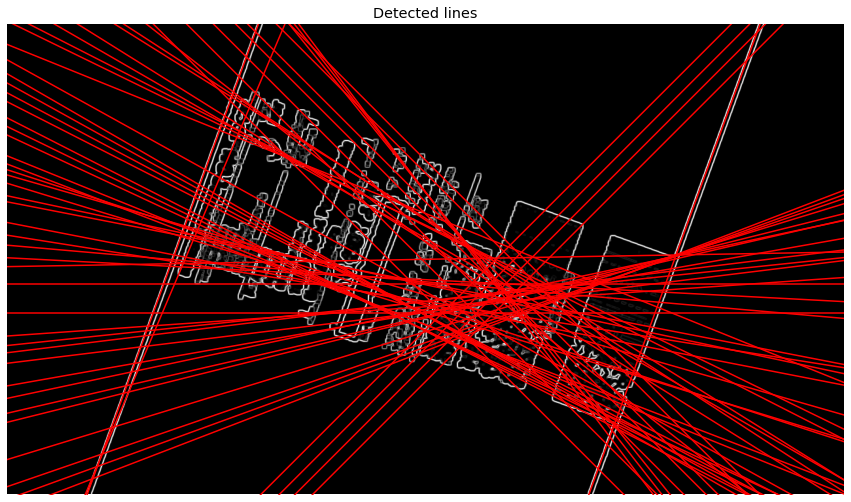

Angle detected: 0.7853981633974483


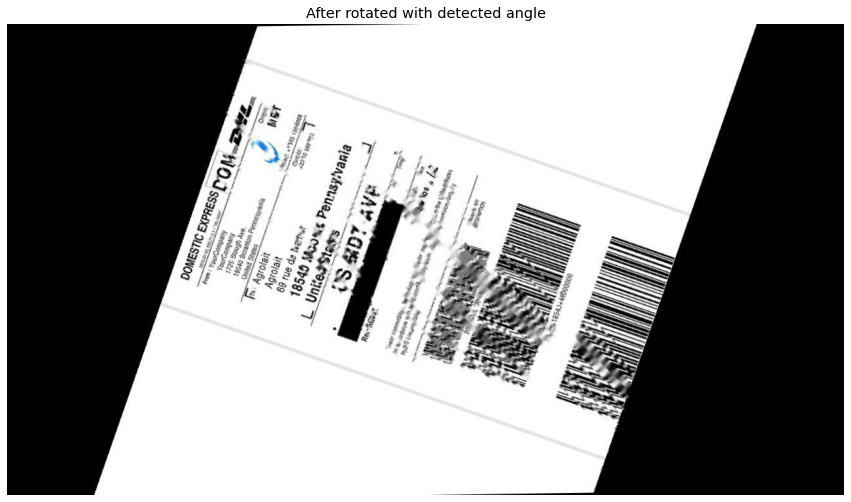

In [230]:
# img = cv2.imread('../data/processed/rotated_70.jpg')
# img = cv2.imread('../data/label2.jpg')
# display_cv2_img(img)
# plt.imshow(plt.imread('../data/processed/rotated_70.jpg'))


# result = pipeline('../data/label2.jpg')
# result = pipeline('../data/processed/rotated_70.jpg')
result = pipeline('../data/tmp_result.jpg')
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(result)
ax.axis('off')
ax.set_title('After rotated with detected angle')
plt.show()

# Cleaning Images before OCR

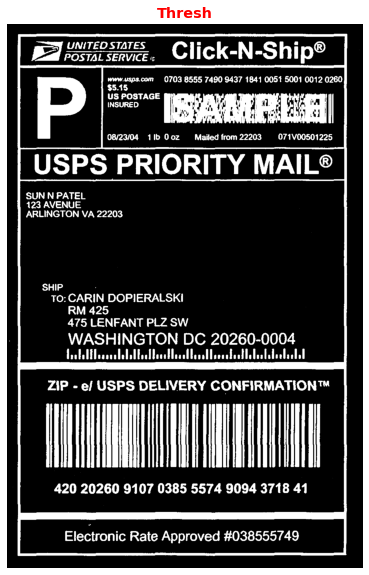

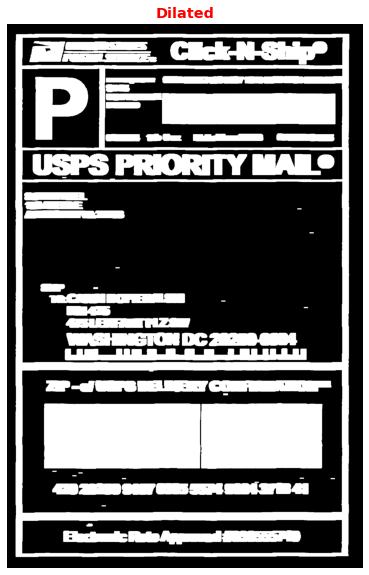

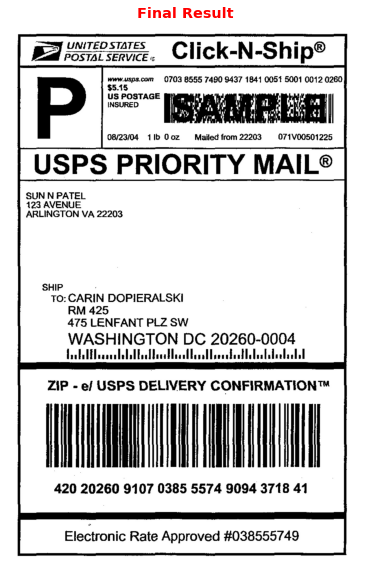

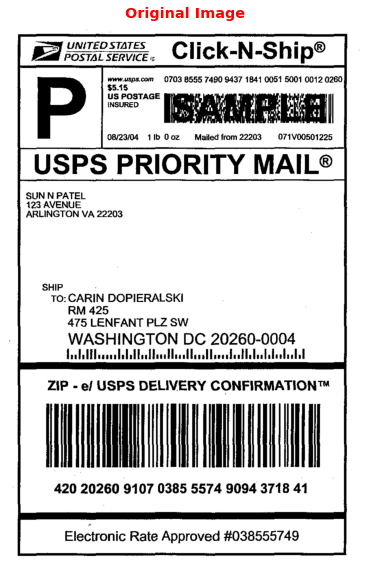

In [219]:
# Load Image
# img = cv2.imread('../data/processed/rotated_70.jpg')
img = cv2.imread('../data/label2.jpg')
# display_cv2_img(img)

# turning to grayscale, and Otsu's threshold
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
## remove noise
gray_img = cv2.GaussianBlur(gray_img,(3,3),0)
thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)[1]

# Determine average contour area
average_area = []
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    area = w * h
    average_area.append(area)
    
average = sum(average_area) / len(average_area)

# Dilate with vertical kernel to connect characters
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 2))
dilate = cv2.dilate(thresh, kernel, iterations=5)

# Remove small noise if contour area is smaller than 4x average
contours = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

for c in contours:
    area = cv2.contourArea(c)
    if area < average * 4:
        cv2.drawContours(dilate, [c], -1, (0, 0, 0), -1)

# Bitwise mask with input image
result = cv2.bitwise_and(img, img, mask=dilate)
result[dilate == 0] = (255, 255, 255)
cv2.imwrite('../data/tmp_result.jpg', result)

# Display the results...
display_cv2_img(thresh, title='Thresh')
display_cv2_img(dilate, title='Dilated')
display_cv2_img(result, title='Final Result')
display_cv2_img(img, title='Original Image')

# Removing Horizontal Lines from an Image

1. Get the Edges
2. Dilate to close the line
3. Hough line to detect the lines
4. Filter out the non-horizontal lines
5. Inpaint the mask
6. Getting the Edges

Time elapsed: 4.9053425788879395


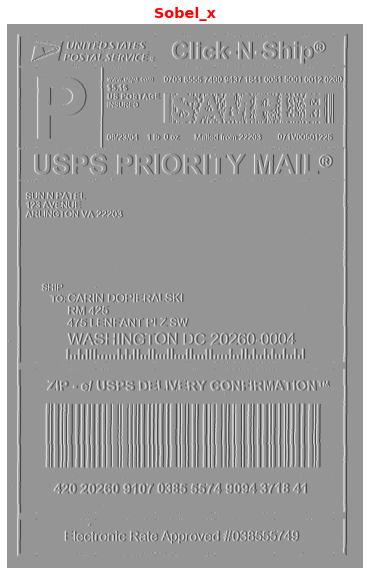

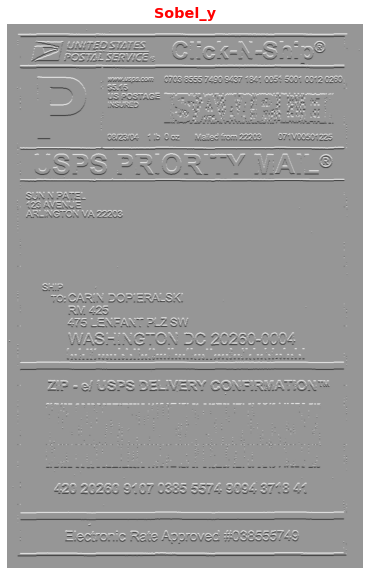

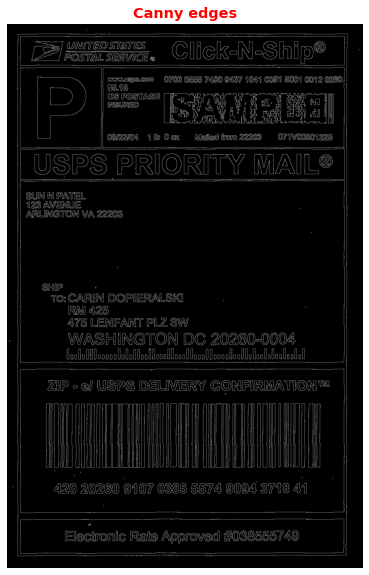

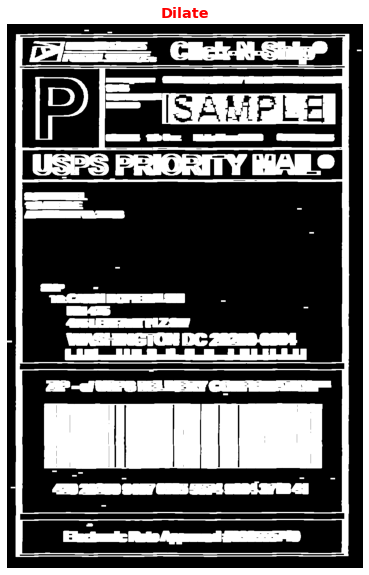

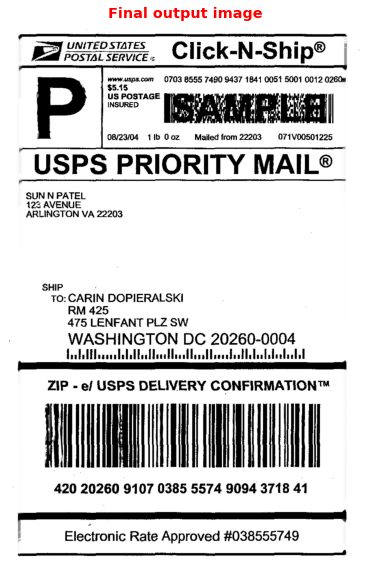

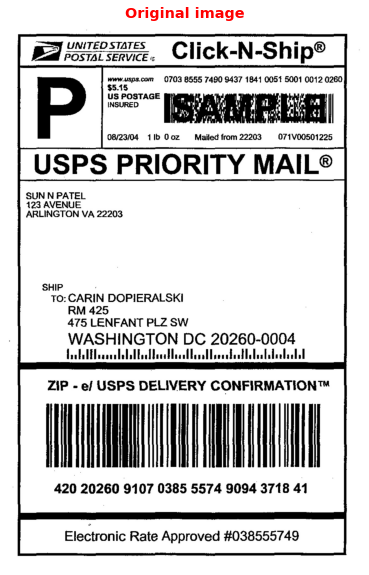

True

In [232]:
start = time.time()
## Read the image
img = cv2.imread('../data/label2.jpg')
# img = cv2.imread('../data/processed/rotated_70.jpg')
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
# img = cv2.imread('../data/processed/rotated_70.jpg')

## Turning into gray image and taking edges of the image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
## remove noise
gray_img = cv2.GaussianBlur(gray_img,(3,3),0)
sobel_x = cv2.Sobel(gray_img,cv2.CV_64F,1,0,ksize=5)
sobel_y = cv2.Sobel(gray_img,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
edges = cv2.Canny(gray_img, 50, 150, apertureSize=3)

## Dilate to close the lines
# dilate = cv2.dilate(edges, np.ones((3, 3), np.uint8), iterations = 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 2)) # optimum_value sofar (5, 2)
dilate = cv2.dilate(edges, kernel, iterations=5) # opitum_value sofar iterations=5
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 5)) # optimum_value sofar (5, 2)
# dilate = cv2.dilate(dilate, kernel, iterations=5) # opitum_value sofar iterations=5

## Applying Hough Transform
lines = cv2.HoughLinesP(
            dilate,
            1, 
            np.pi / 180,
            threshold=100,
            minLineLength=3, # Minimum length of line, segments shorter than this are rejected
            maxLineGap=5     # Maximum allowed gap between line segments to treat them as a single line
            )

## Filter out non-horizontal lines using slope
lines_list = []
for points in lines:
    x1, y1, x2, y2 = points[0]
    lines_list.append([(x1, y1), (x2, y2)])
    slope = ((y2 - y1) / (x2 - x1)) if (x2 - x1) != 0 else np.inf
    
    if slope >= 1:
        cv2.line(mask,(x1,y1),(x2,y2), color=(255, 255, 255),thickness = 2)

# printing the mask
Image.fromarray(mask).show()

## Inpaint the mask
result = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)

end = time.time()
print(f'Time elapsed: {end - start}')


## showing images
# Image.fromarray(edges_x).show()
display_img(sobel_x, title='Sobel_x')
display_img(sobel_y, title='Sobel_y')
# display_img(laplacian, title='Laplacian')
display_cv2_img(edges, title='Canny edges')
display_cv2_img(dilate, title='Dilate')
display_cv2_img(result, title='Final output image')
display_cv2_img(img, title='Original image')
# Image.fromarray(edges).show()
cv2.imwrite('../data/tmp_result.jpg', result)

Based on the structural element is used, the output varies as resulted image depends on the dilation operation.